dl array: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
ds array: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


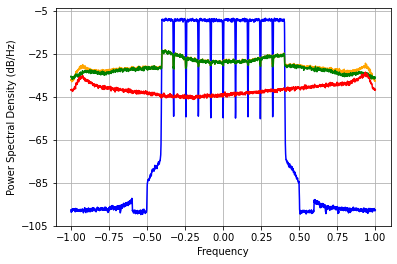

Accuracy =  27.1525830725244 dbs


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

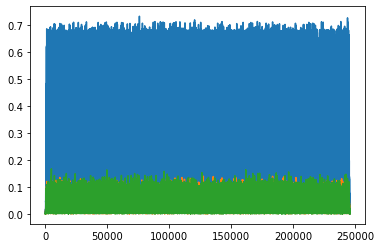

In [76]:
# -*- coding: utf-8 -*-
"Modifided by Adam Reyn"
"14.08.2020"


## descrtiption about main task
## e(n) = d(n) - u.t(n)*w
##  in conclusion
## y = U*w => e = d - U*w


##Includes

import numpy as np
import matplotlib.pyplot as plt

##func for gradient step

def mu_opt_calc(gamma, R):
    gamma = gamma.reshape(gamma.shape[0], 1)
    gammaH = np.conj(gamma).reshape(1, gamma.shape[0])
    mu_opt = np.dot(gammaH, gamma) / np.dot(np.dot(gammaH, R), gamma)
    return mu_opt[0, 0]


def NMSE(x, y):
    return 10*np.log10(np.abs(np.matmul(np.conj(x.T), x)/np.matmul(np.conj(y.T), y)))
    

x = np.load('data/lte_10c_data0_in.npy')
y = np.load('data/lte_10c_data0_out.npy')

d = y - x

##constants

dl_size = 21
ds_size = 21

steps = 100

ORD = 7

i = 0

dl_num = -10
ds_num = -10

##creating and init buffer of delays

dl = np.zeros(dl_size, dtype = int)
ds = np.zeros(ds_size, dtype = int)

for i in range(dl_size):
    dl[i] = dl_num
    dl_num = dl_num + 1
    
i = 0

for i in range(ds_size):
    ds[i] = ds_num
    ds_num = ds_num + 1
    
    
##print for debug    
print("dl array:", dl)
print("ds array:", ds)

mem = len(dl)


U = np.zeros((len(d), mem*(ORD+1)), dtype = complex)

ind = np.arange(abs(num), len(d)-(abs(num)))
for k in ind:
    for m in range(mem):
        for p in range(ORD+1):
            U[k, p+m*(ORD+1) ] = x[k - dl[m]] * abs(x[k - ds[m]])**(2*p)
                        
            
##LS estimation
     
Rxx = np.matmul(np.conj(U.T), U)
rdy = np.matmul(np.conj(U.T), d)

w = np.matmul(np.linalg.pinv(Rxx),rdy)


"""
##  LMS estimation ##
w = np.zeros(mem*(ORD+1), dtype=complex)

for i in range(steps):
    gamma = p - np.matmul(Rxx,w)
    mu_opt = mu_opt_calc(gamma, Rxx)
    w = w - mu_opt*(np.matmul(Rxx, w) - rdy)  
    
"""

z = np.matmul(U, w)


plt.figure(1)

#input signal
plt.psd(x, NFFT = 2048, color = "blue")

#desired signal 
plt.psd(d, NFFT = 2048, color = "orange")

#output signal
plt.psd(z, NFFT = 2048, color = "green")

#error of the signal
#we should minimaze this signal
plt.psd(d-z, NFFT = 2048, color = "red")

plt.grid(True)
plt.show()


accuracy = NMSE(x, z-d)

print('Accuracy = ',  accuracy, 'dbs')
        

plt.figure(2)
plt.plot(abs(x))
plt.plot(abs(d))
plt.plot(abs(z))
plt.plot